### K-Nearest Neighbors is an algorithm for supervised learning. 
Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification

In [81]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows:
* 1- Basic Service 
* 2- E-Service 
* 3- Plus Service 
* 4- Total Service

Our objective is to build a classifier with KNN, to predict the class of unknown cases.

In [45]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/teleCust1000t.csv")
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


In [46]:
#how many person are in each class?
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

* 281 Plus Service 
* 266 Basic-service  
* 236 Total Service
* 217 E-Service customers

In [47]:
df.dtypes

region       int64
tenure       int64
age          int64
marital      int64
address      int64
income     float64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object

# Visualisation


In [48]:
df['age'].min()

18

In [49]:
df['ed'].unique()

array([4, 5, 1, 2, 3], dtype=int64)

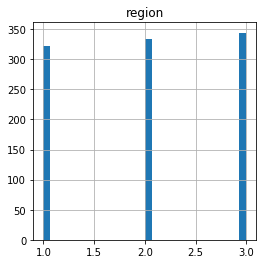

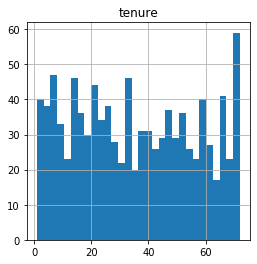

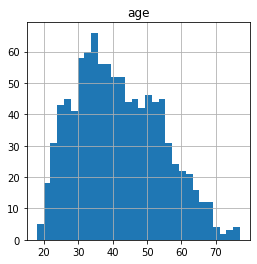

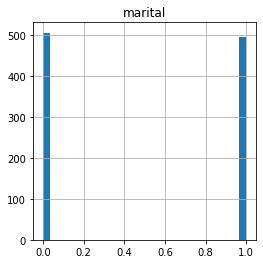

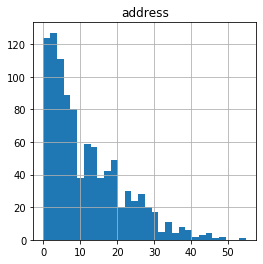

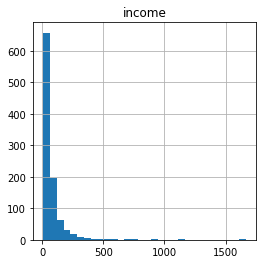

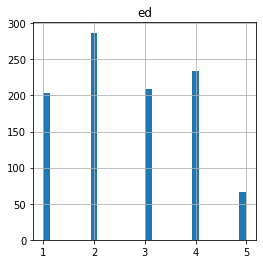

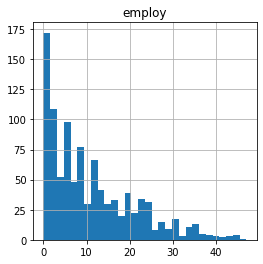

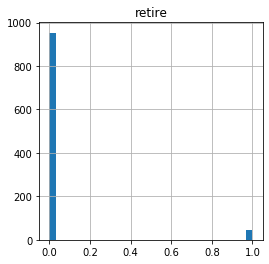

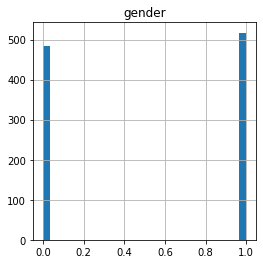

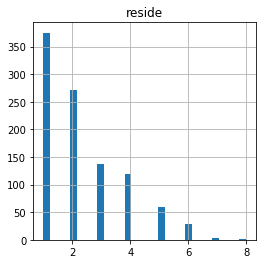

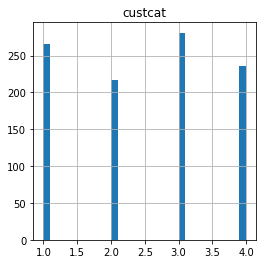

In [50]:
for i in list(df.columns):
    df.hist(column=i,bins=30,figsize=(4,4))
    plt.title(i)
    plt.show()

In [51]:
#X=df.loc[:, df.columns != 'custcat']
X =df.iloc[:,:-1]
y=df.iloc[:,-1:]
X[0:4]


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1


In [52]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:4]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794]])

# train-test split

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800, 1)
Test set: (200, 11) (200, 1)


# KNN modeling & Evaluation

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
from sklearn import metrics

k = range(1,10)
#Train Model and Predict
for i in k:

    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    ypred = neigh.predict(X_test)
    print("Test set Accuracy for k=",i," ", metrics.accuracy_score(y_test, ypred))


Test set Accuracy for k= 1   0.3
Test set Accuracy for k= 2   0.29
Test set Accuracy for k= 3   0.315
Test set Accuracy for k= 4   0.32
Test set Accuracy for k= 5   0.315
Test set Accuracy for k= 6   0.31
Test set Accuracy for k= 7   0.335
Test set Accuracy for k= 8   0.325
Test set Accuracy for k= 9   0.34


* the best accuracy is 0.34 with k-9